# Analisis de series de tiempo

## Ventas en tiendas - Forecasting con AR, ARMA, ARIMA, SARIMA

### importar librerias

In [37]:
# Librerias base
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

# Librerias de statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

## Analisis exploratorio de datos
### Importando y cargando los dataset

In [38]:
trainset = pd.read_csv('./Datasets/train.csv')
trainset

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


<AxesSubplot: >

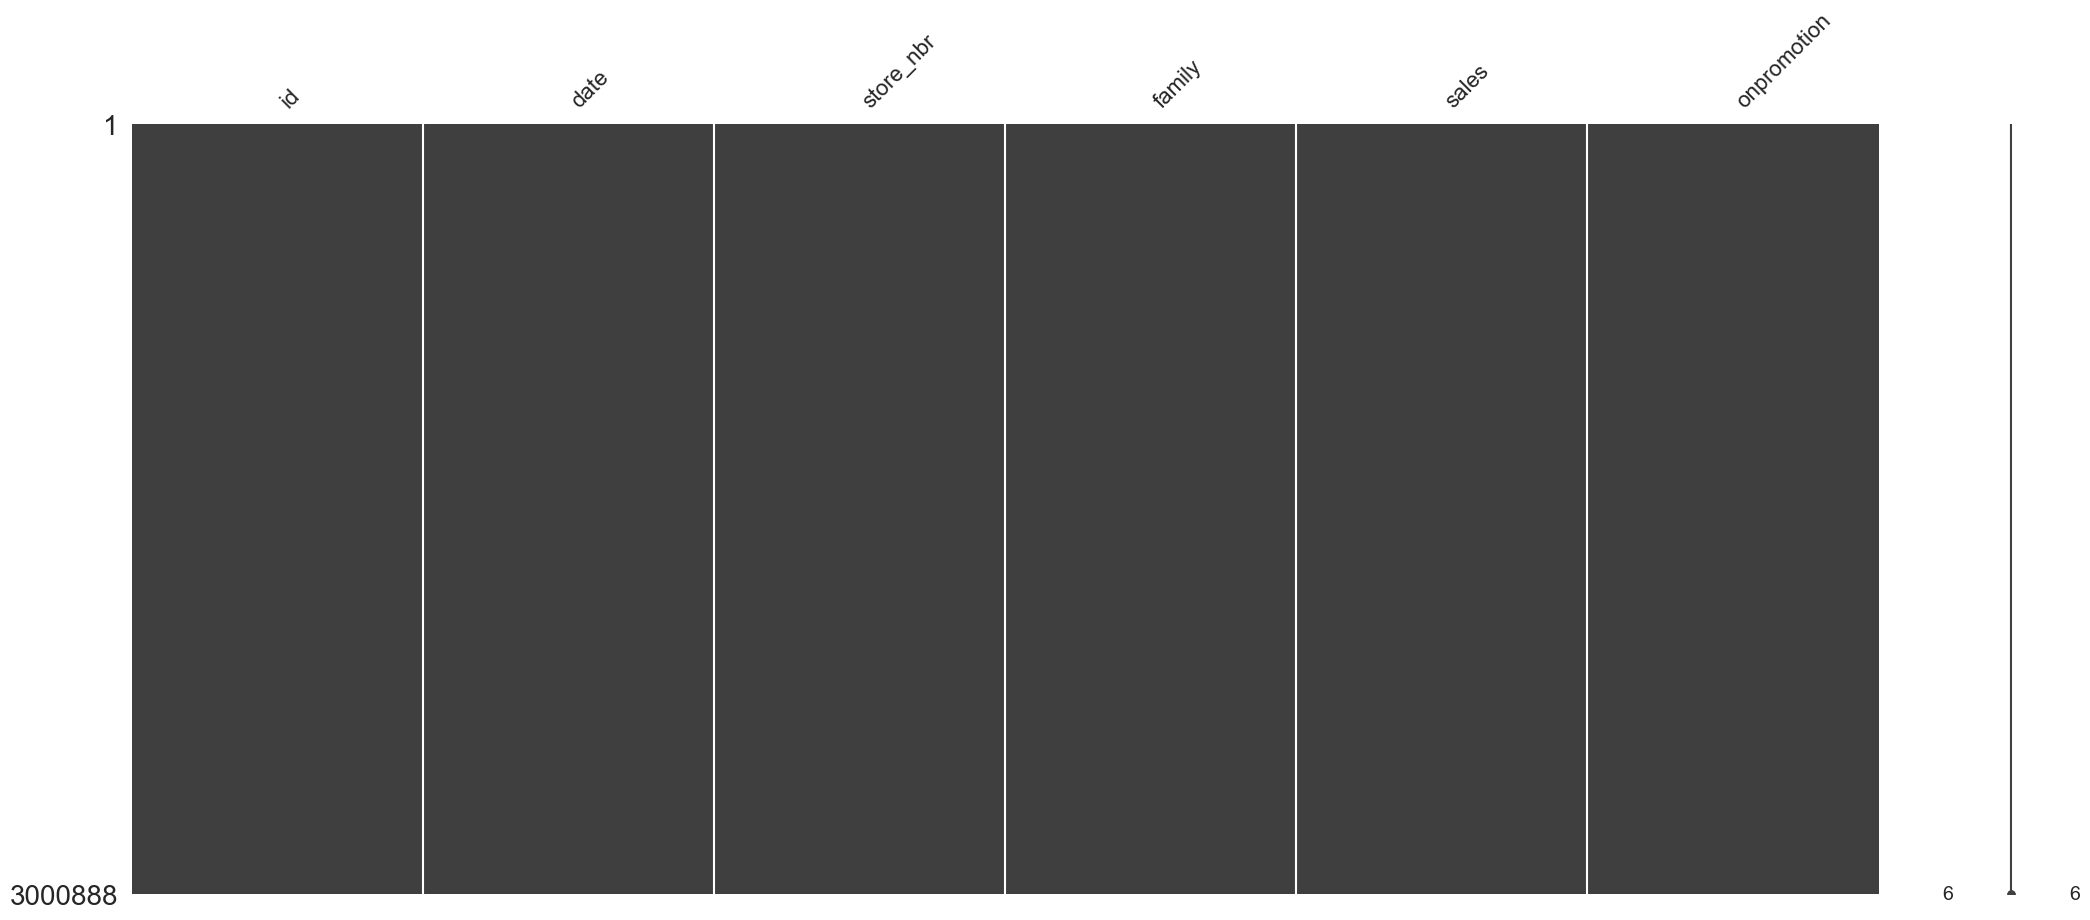

In [39]:
msno.matrix(trainset)

### Podemos ver que no hay datos faltantes

In [40]:
## Verificamos los tipos de datos

trainset.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [41]:
## Verificamos las categorias
families = trainset['family'].unique()
# dimension de families
families

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [42]:
# Cantidad de tipos de productos
len(families)

33

In [43]:
# Numero de tiendas
stores = trainset['store_nbr'].unique()
list(stores)
stores.sort()
stores

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

In [44]:
#Aislamiento de los datos de la tienda 1 para la familia de productos 'AUTOMOTRIZ':
trainset_1_auto=trainset.loc[(trainset.store_nbr==1)&(trainset.family=='AUTOMOTIVE')]

In [45]:
trainset_1_auto

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0
3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0
5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0
7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0
...,...,...,...,...,...,...
2991978,2991978,2017-08-11,1,AUTOMOTIVE,1.0,0
2993760,2993760,2017-08-12,1,AUTOMOTIVE,6.0,0
2995542,2995542,2017-08-13,1,AUTOMOTIVE,1.0,0
2997324,2997324,2017-08-14,1,AUTOMOTIVE,1.0,0


In [46]:
# Definiendo indices
pd.to_datetime(trainset_1_auto['date'], format='%Y-%m-%d')
trainset_1_auto.set_index('date', inplace=True)
trainset_1_auto.index=pd.DatetimeIndex(trainset_1_auto.index)

In [47]:
trainset_1_auto

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-02,1782,1,AUTOMOTIVE,2.0,0
2013-01-03,3564,1,AUTOMOTIVE,3.0,0
2013-01-04,5346,1,AUTOMOTIVE,3.0,0
2013-01-05,7128,1,AUTOMOTIVE,5.0,0
...,...,...,...,...,...
2017-08-11,2991978,1,AUTOMOTIVE,1.0,0
2017-08-12,2993760,1,AUTOMOTIVE,6.0,0
2017-08-13,2995542,1,AUTOMOTIVE,1.0,0


In [48]:
# Verificando si hay indices duplicados
trainset_1_auto.index.duplicated().sum()

0

<AxesSubplot: xlabel='date'>

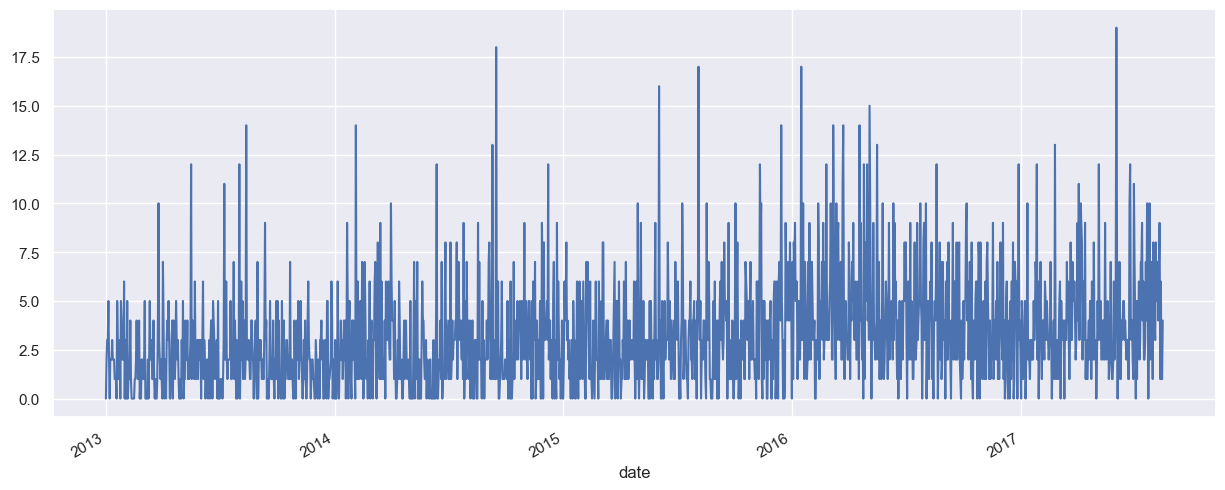

In [49]:
# Visualizando 
trainset_1_auto.sales.plot(figsize=(15,6))

<AxesSubplot: xlabel='date'>

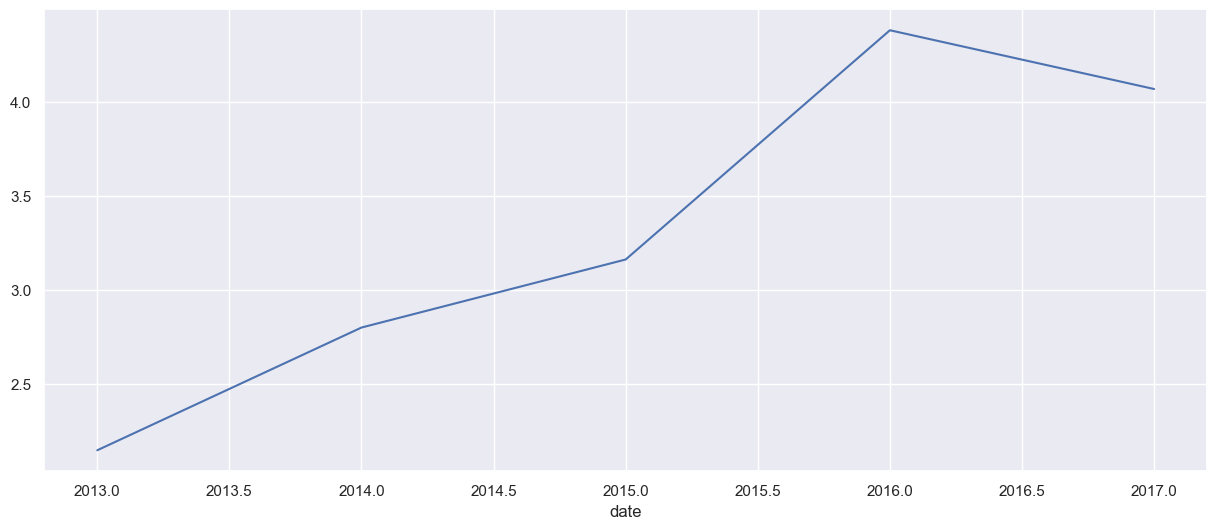

In [50]:
# Por año
trainset_1_auto.sales.groupby(trainset_1_auto.index.year).mean().plot(figsize=(15, 6))

# Hay una tendencia al alza en el número de ventas de productos automotrices desde 2013 hasta 2016, con una tendencia a la baja desde 2016 hasta agosto de 2017.

<AxesSubplot: xlabel='date'>

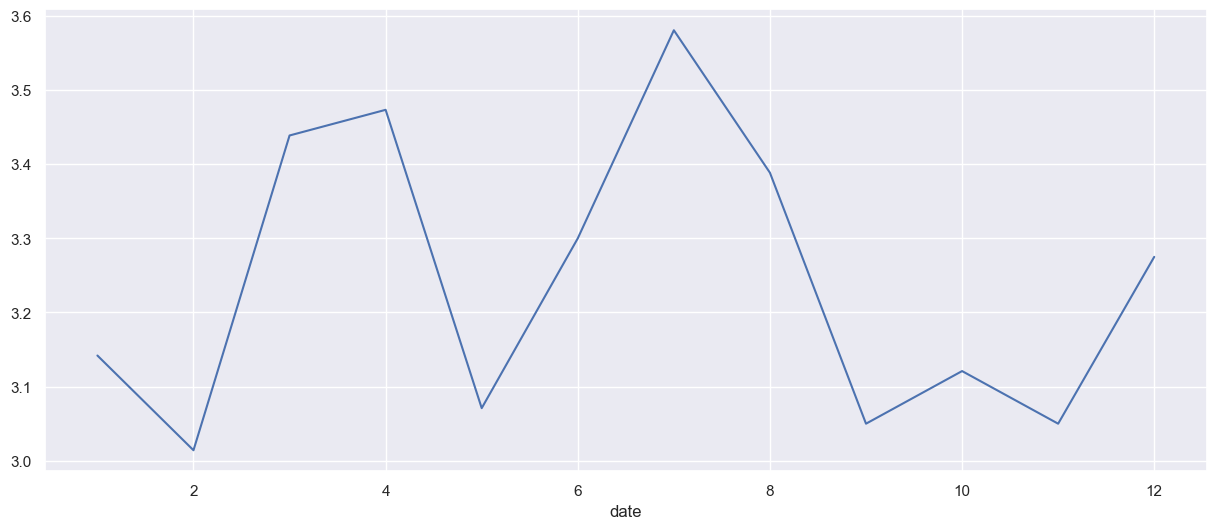

In [51]:
# Por mes
trainset_1_auto.sales.groupby(trainset_1_auto.index.month).mean().plot(figsize=(15, 6))

# Cada 4 meses hay un repunte en las ventas

<AxesSubplot: xlabel='date'>

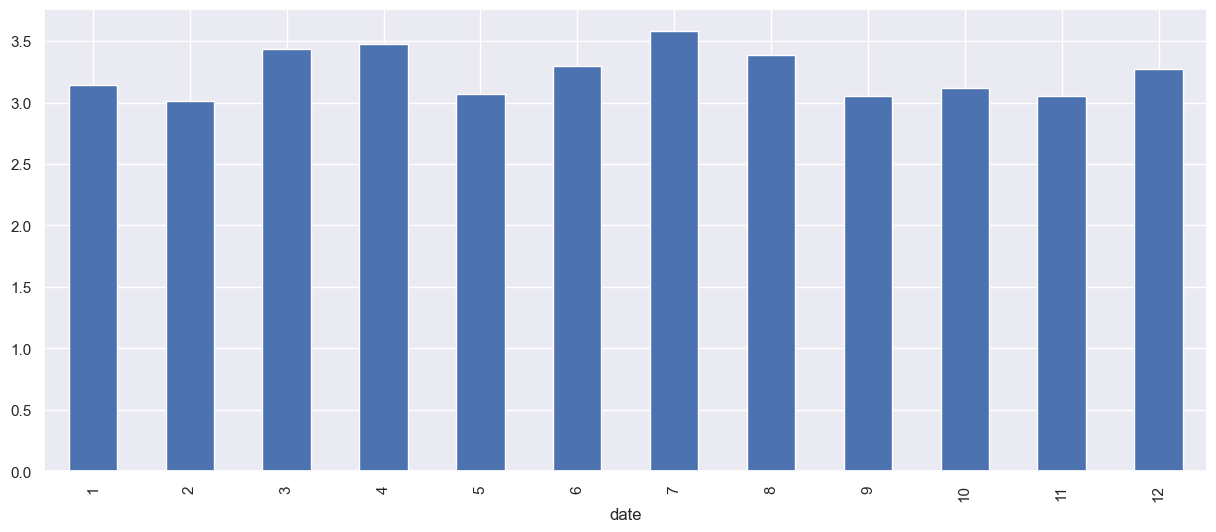

In [52]:
trainset_1_auto.sales.groupby(trainset_1_auto.index.month).mean().plot(figsize=(15, 6), kind='bar')

/var/folders/h4/61symv9x3_5991plfxzgzsv80000gn/T/ipykernel_96321/1716702274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset_1_auto['month'] = pd.to_datetime(trainset_1_auto.index).month
/var/folders/h4/61symv9x3_5991plfxzgzsv80000gn/T/ipykernel_96321/1716702274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset_1_auto['year'] = pd.to_datetime(trainset_1_auto.index).year


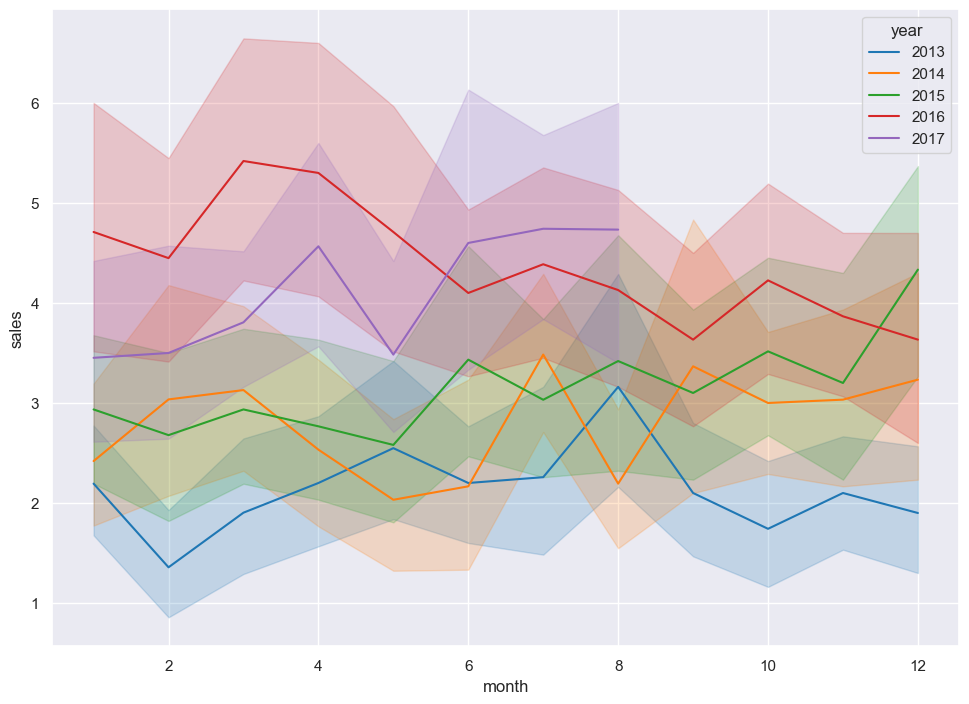

In [53]:
trainset_1_auto['month'] = pd.to_datetime(trainset_1_auto.index).month
trainset_1_auto['year'] = pd.to_datetime(trainset_1_auto.index).year
sns.lineplot(x='month', y='sales', hue='year', data=trainset_1_auto, palette='tab10')
sns.set(rc={'figure.figsize':(11.7,8.27)})

/var/folders/h4/61symv9x3_5991plfxzgzsv80000gn/T/ipykernel_96321/2377950289.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='year', y='sales', data=trainset_1_auto, palette='tab10')


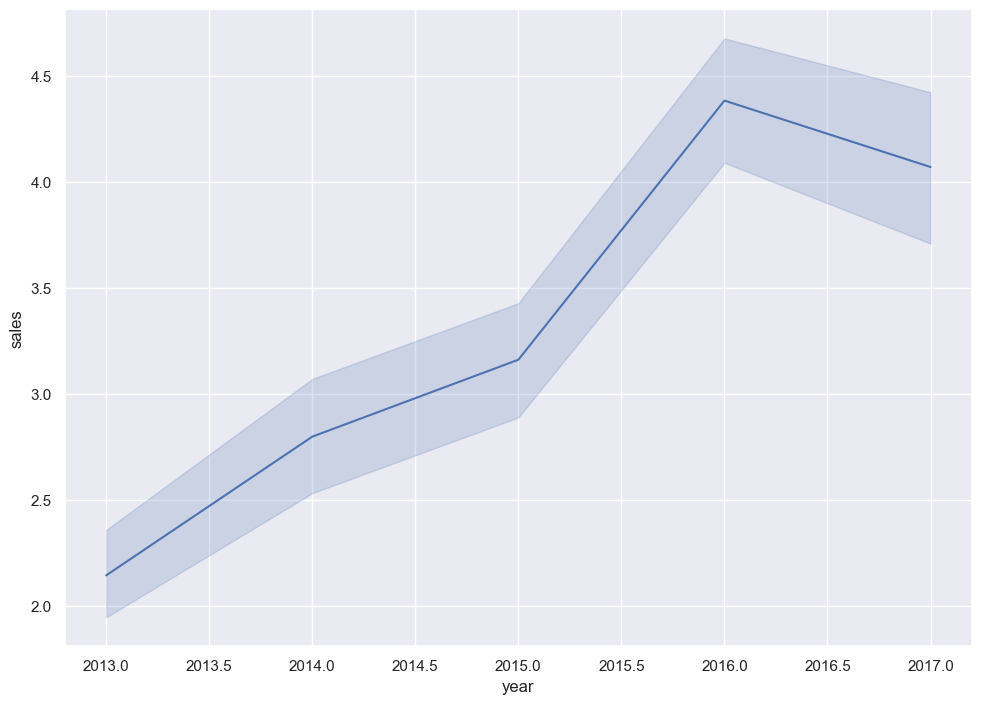

In [54]:
sns.lineplot(x='year', y='sales', data=trainset_1_auto, palette='tab10')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [55]:
#Definiendo dos tercios de los datos para entrenamiento y un tercio para prueba:

train=trainset_1_auto[:int(2/3*trainset_1_auto.shape[0])]
test=trainset_1_auto[int(2/3*trainset_1_auto.shape[0]+1):]

In [56]:
# Viendo el tamaño de los datos de entrenamiento y prueba
train.shape, test.shape

((1122, 7), (561, 7))

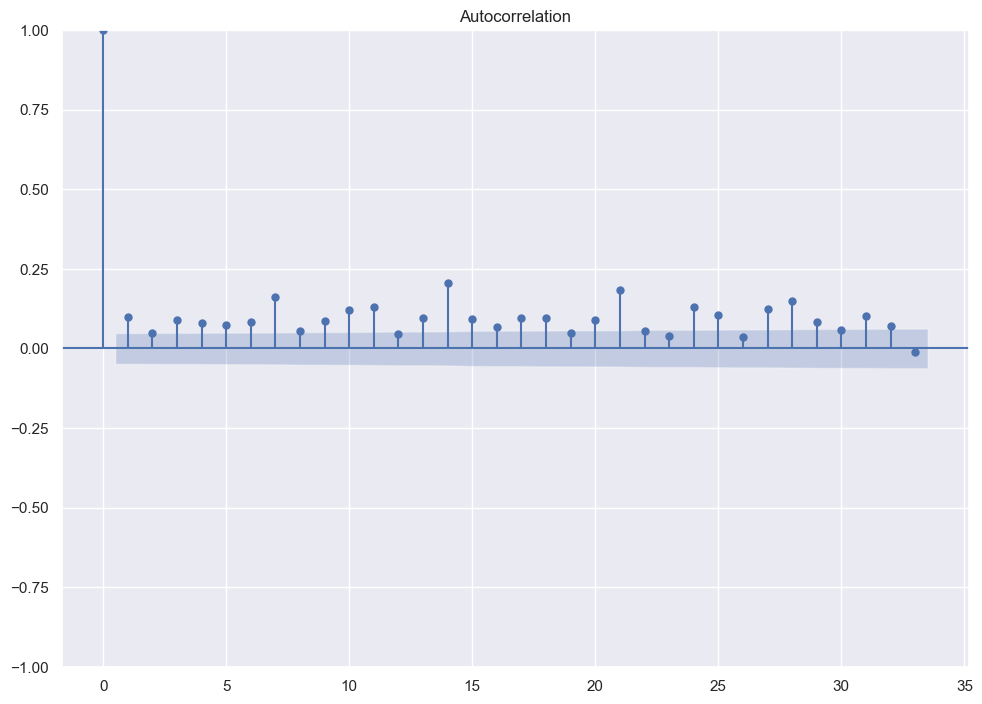

In [57]:
# Autocorrelacion
plot_acf(trainset_1_auto.sales)
plt.show()

##### Analizando el intervalo de confianza, existe una correlación total solo con la variable lag=1. Para los modelos ARMA, ARIMA y SARIMA se puede utilizar q=1.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


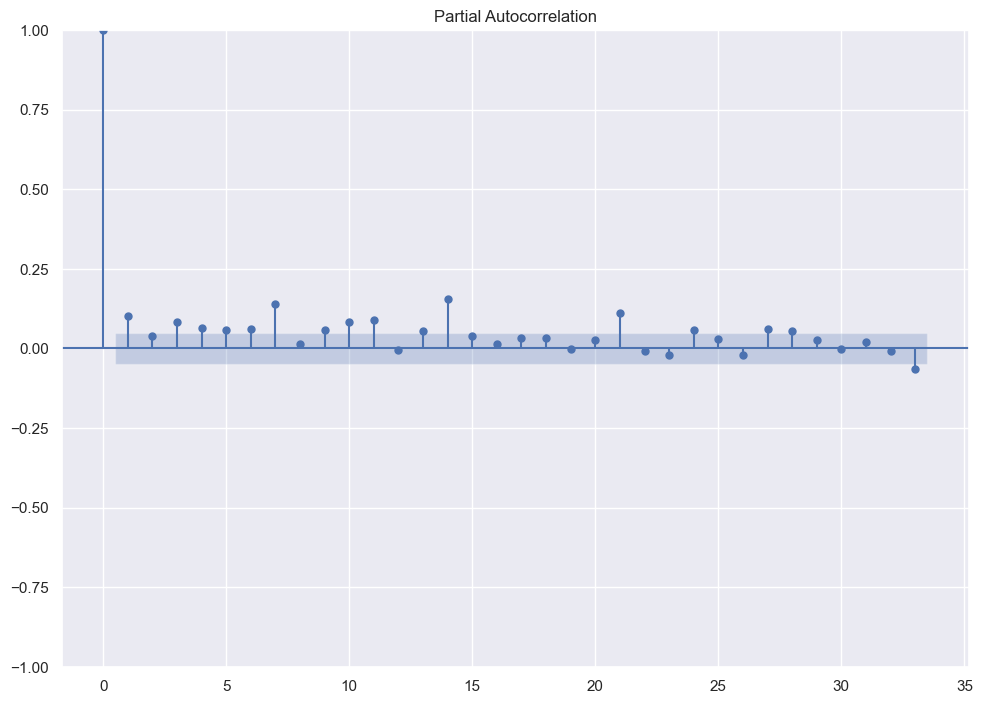

In [58]:
plot_pacf(trainset_1_auto.sales)
plt.show()

##### Analizando el intervalo de confianza, existe una correlación parcial con las variables de lag=1, lag=7, lag=14 y lag=21. El número de ventas en un día se relaciona con el número de ventas del día anterior y el número de ventas hace una, dos y tres semanas. Para los modelos AR, ARMA, ARIMA y SARIMA se puede utilizar p=[1, 7, 14, 21].

##### Modelos para store_nbr=1 y family='AUTOMOTIVE'

### AR

In [59]:
ar_1_auto = AutoReg(train.sales, lags=[1,7,14,21]).fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [60]:
ar_1_auto.params

const        1.718945
sales.L1     0.036126
sales.L7     0.077897
sales.L14    0.130355
sales.L21    0.140094
dtype: float64

In [61]:
# Predicciones del propio conjunto de datos de entrenamiento:

pred_ar_1_auto=ar_1_auto.params[0]+ar_1_auto.params[1]*train.sales.shift(7)+ar_1_auto.params[2]*train.sales.shift(14)+ar_1_auto.params[3]*train.sales.shift(21)
pred_ar_1_auto


date
2013-01-01         NaN
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-05         NaN
                ...   
2016-01-26    3.382172
2016-01-27    3.192437
2016-01-28    2.562640
2016-01-29    3.013085
2016-01-30    4.005953
Name: sales, Length: 1122, dtype: float64

<AxesSubplot: xlabel='date'>

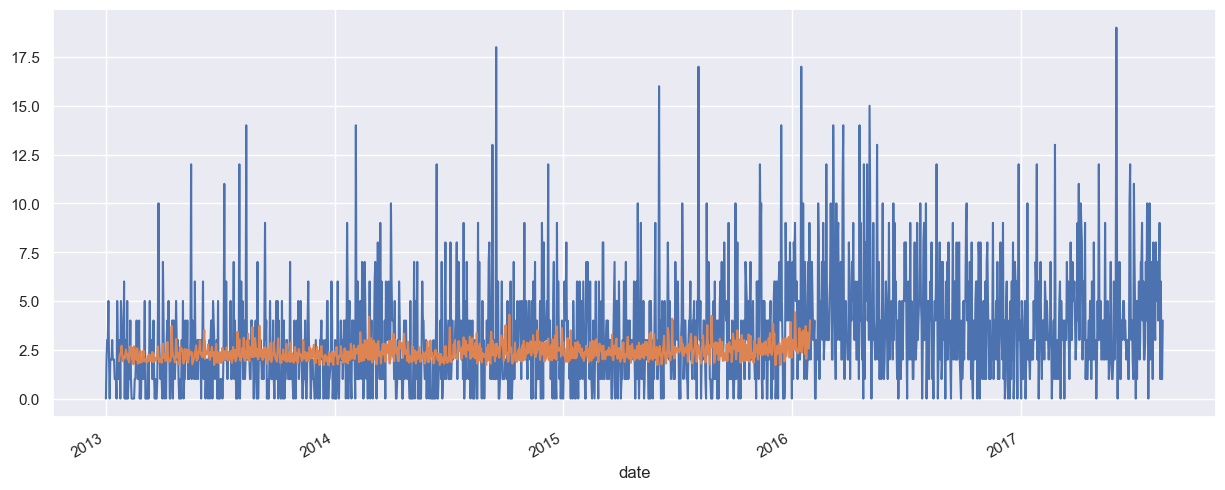

In [62]:
#Comparando modelo con datos reales:

trainset_1_auto.sales.plot(figsize=(15,6))
pred_ar_1_auto.plot(figsize=(15,6))

In [63]:
#Predicción a partir del conjunto de datos de prueba:
prediccion_ar_1_auto=ar_1_auto.params[0]+ar_1_auto.params[1]*test.sales.shift(7)+ar_1_auto.params[2]*test.sales.shift(14)+ar_1_auto.params[3]*test.sales.shift(21)
prediccion_ar_1_auto

date
2016-02-01         NaN
2016-02-02         NaN
2016-02-03         NaN
2016-02-04         NaN
2016-02-05         NaN
                ...   
2017-08-11    3.856780
2017-08-12    3.254002
2017-08-13    2.013597
2017-08-14    3.116421
2017-08-15    3.556483
Name: sales, Length: 561, dtype: float64

<AxesSubplot: xlabel='date'>

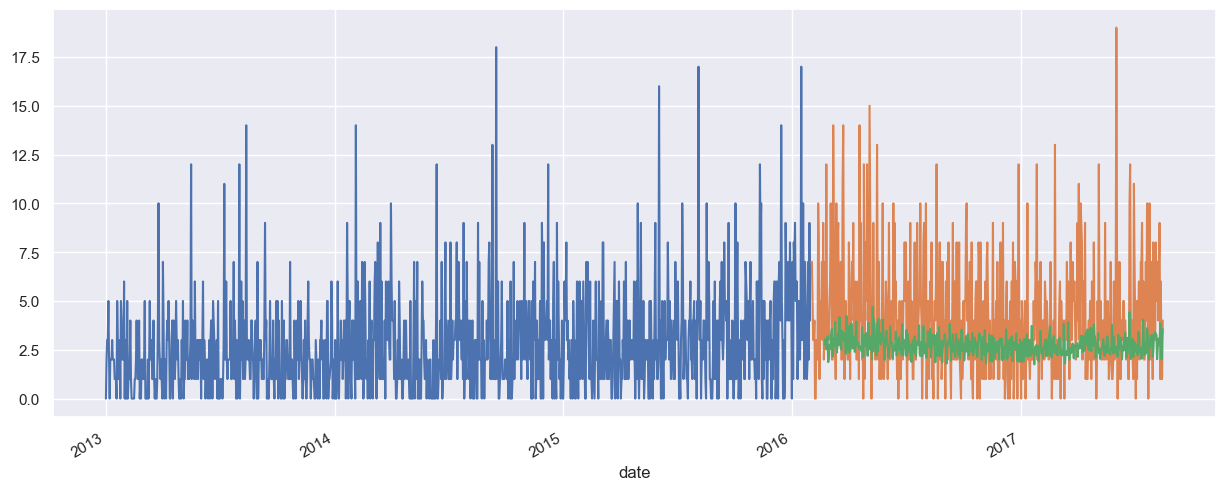

In [64]:
# Visualizando las predicciones
train.sales.plot(figsize=(15,6))
test.sales.plot(figsize=(15,6))
prediccion_ar_1_auto.plot(figsize=(15,6))

In [65]:
# Calculando el error cuadratico medio
ar_1_auto_mse = ((test.sales - prediccion_ar_1_auto)**2).mean()
ar_1_auto_mse

10.677300766154707

### ARMA

In [66]:
# Creando el modelo ARMA
arma_1_auto = ARIMA(train.sales, order=(1,0,1)).fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
arma_1_auto.params

const     2.916076
ar.L1     0.998389
ma.L1    -0.981860
sigma2    6.172760
dtype: float64

In [68]:
arma_1_auto.predict()

date
2013-01-01    2.916076
2013-01-02    2.643855
2013-01-03    2.589311
2013-01-04    2.622165
2013-01-05    2.650231
                ...   
2016-01-26    4.008712
2016-01-27    3.973750
2016-01-28    4.022068
2016-01-29    3.986864
2016-01-30    4.068001
Name: predicted_mean, Length: 1122, dtype: float64

<AxesSubplot: xlabel='date'>

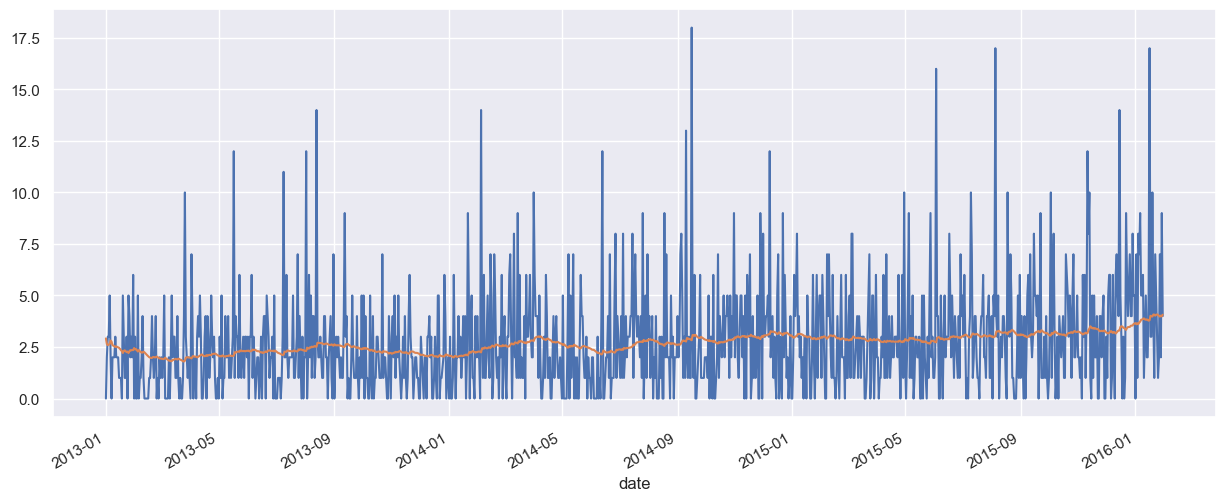

In [69]:
# Comparando el modelo con los datos reales

train.sales.plot(figsize=(15,6))
arma_1_auto.predict().plot(figsize=(15,6))

##### El modelo logra capturar la tendencia, pero no la variabilidad

In [70]:
# Predicciones para el conjunto de datos de prueba:

prediccion_arma_1_auto=arma_1_auto.predict(start=train.shape[0]+1, end=train.shape[0]+test.shape[0])
prediccion_arma_1_auto.index=test.index
prediccion_arma_1_auto

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


date
2016-02-01    4.063171
2016-02-02    4.061324
2016-02-03    4.059479
2016-02-04    4.057638
2016-02-05    4.055799
                ...   
2017-08-11    3.384215
2017-08-12    3.383461
2017-08-13    3.382708
2017-08-14    3.381957
2017-08-15    3.381206
Name: predicted_mean, Length: 561, dtype: float64

<AxesSubplot: xlabel='date'>

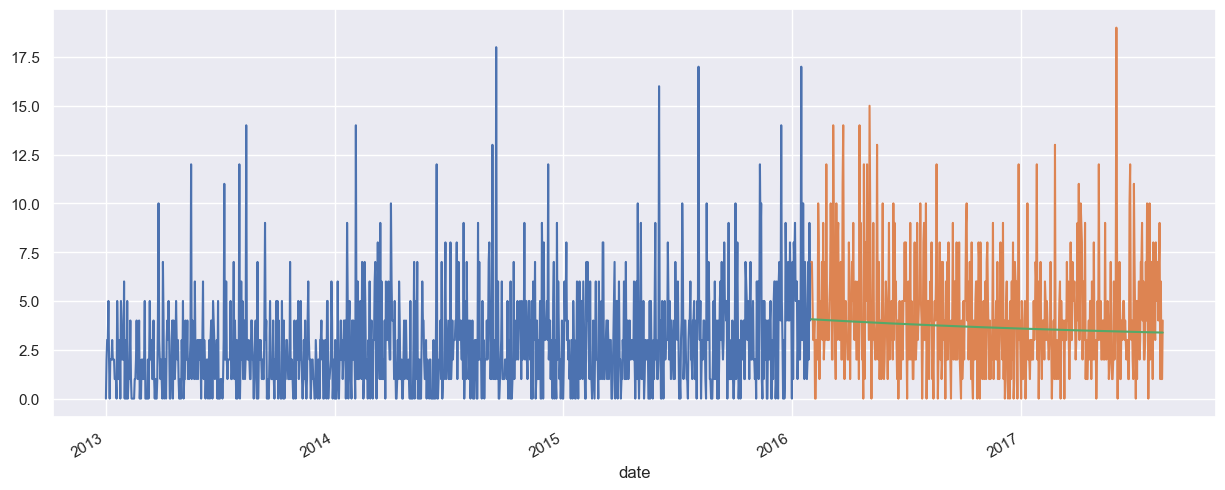

In [71]:
# Visualizando las predicciones
train.sales.plot(figsize=(15,6))
test.sales.plot(figsize=(15,6))
prediccion_arma_1_auto.plot(figsize=(15,6))

#### El modelo logra capturar la tendencia (descenso en el número de ventas a partir de 2016), pero no la variabilidad.

In [72]:
# Calculando el error cuadratico medio
arma_1_auto_SME=((test.sales - prediccion_arma_1_auto)**2).mean()
arma_1_auto_SME

8.863183708890423

## ARIMA

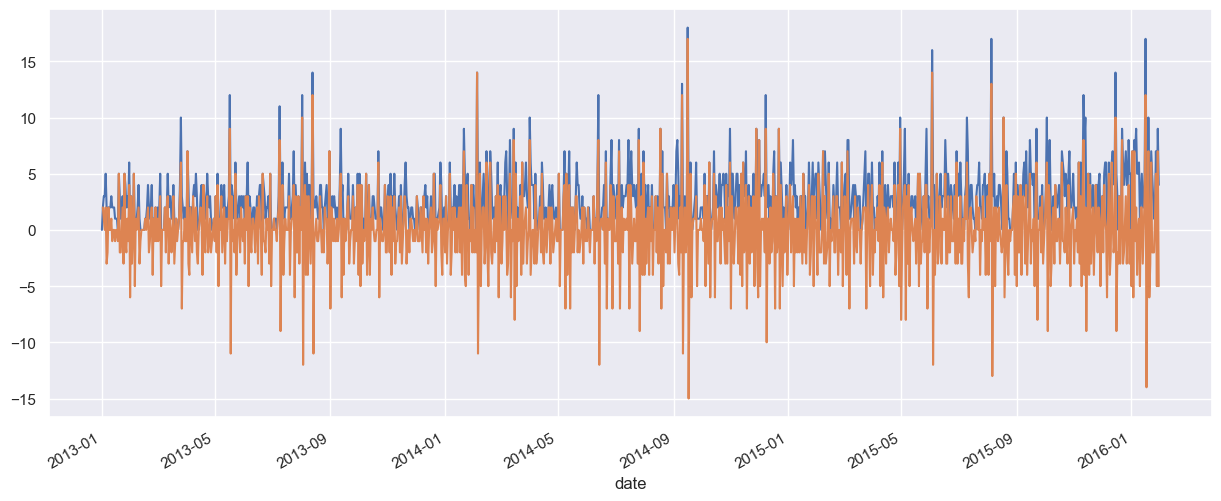

In [73]:
train.sales.plot(figsize=(15,6))
plt.plot(train.sales.diff())

In [74]:
# Definiendo el modelo ARIMA
arima_1_auto = ARIMA(train.sales, order=([1,7,14,21], 1, 1)).fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

In [75]:
arima_1_auto.params

ar.L1     0.025783
ar.L7     0.043103
ar.L14    0.058191
ar.L21    0.084666
ma.L1    -0.745815
sigma2    7.657510
dtype: float64

In [76]:
# Predicciones del propio conjunto de datos de entrenamiento:
arima_1_auto.predict(typ='levels')
#Donde "type='levels'" corrige los valores pronosticados "invirtiendo" la diferenciación

date
2013-01-01    0.000000
2013-01-02    0.000000
2013-01-03    1.069854
2013-01-04    1.816339
2013-01-05    2.189175
                ...   
2016-01-26    4.038506
2016-01-27    3.282271
2016-01-28    3.888203
2016-01-29    3.712528
2016-01-30    5.933757
Name: predicted_mean, Length: 1122, dtype: float64

<AxesSubplot: xlabel='date'>

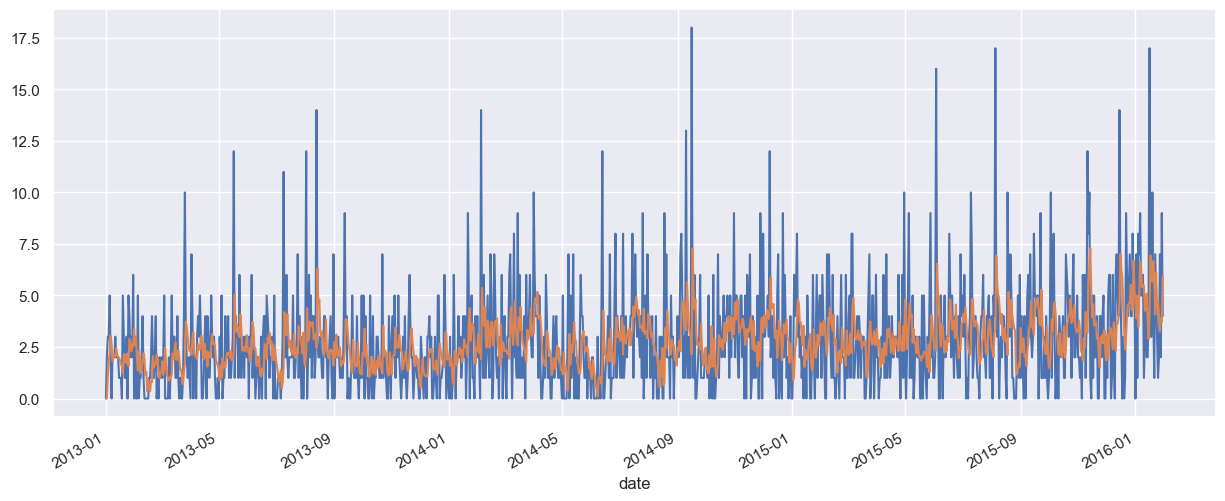

In [77]:
#Comparando modelo con datos reales:
train.sales.plot(figsize=(15,6))
arima_1_auto.predict(typ='levels').plot(figsize=(15,6))

### El modelo logra capturar mejor la variabilidad que el modelo ARMA.

In [78]:
# Predicciones para el conjunto de datos de prueba:
prediccion_arima_1_auto=arima_1_auto.predict(start=train.shape[0]+1, end=train.shape[0]+test.shape[0], typ='levels')
prediccion_arima_1_auto.index=test.index
prediccion_arima_1_auto

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


date
2016-02-01    4.071942
2016-02-02    4.693851
2016-02-03    4.322258
2016-02-04    3.922587
2016-02-05    4.817150
                ...   
2017-08-11    4.436901
2017-08-12    4.436901
2017-08-13    4.436901
2017-08-14    4.436901
2017-08-15    4.436901
Name: predicted_mean, Length: 561, dtype: float64

<AxesSubplot: xlabel='date'>

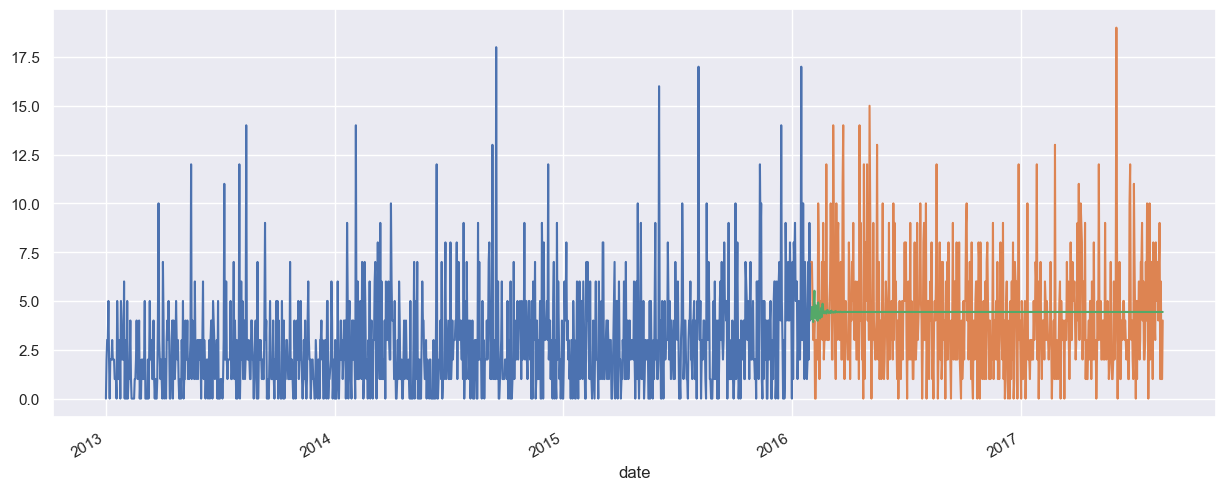

In [79]:
# Visualizando las predicciones
train.sales.plot(figsize=(15,6))
test.sales.plot(figsize=(15,6))
prediccion_arima_1_auto.plot(figsize=(15,6))


## El modelo no puede hacer buenas predicciones para tiempos muy lejanos (alta propagación de errores).

In [80]:
# Calculando el error cuadratico medio
arima_1_auto_SME=((test.sales - prediccion_arima_1_auto)**2).mean()
arima_1_auto_SME

8.632006326806547

# SARIMA

# Analizando por mes:

<AxesSubplot: xlabel='date'>

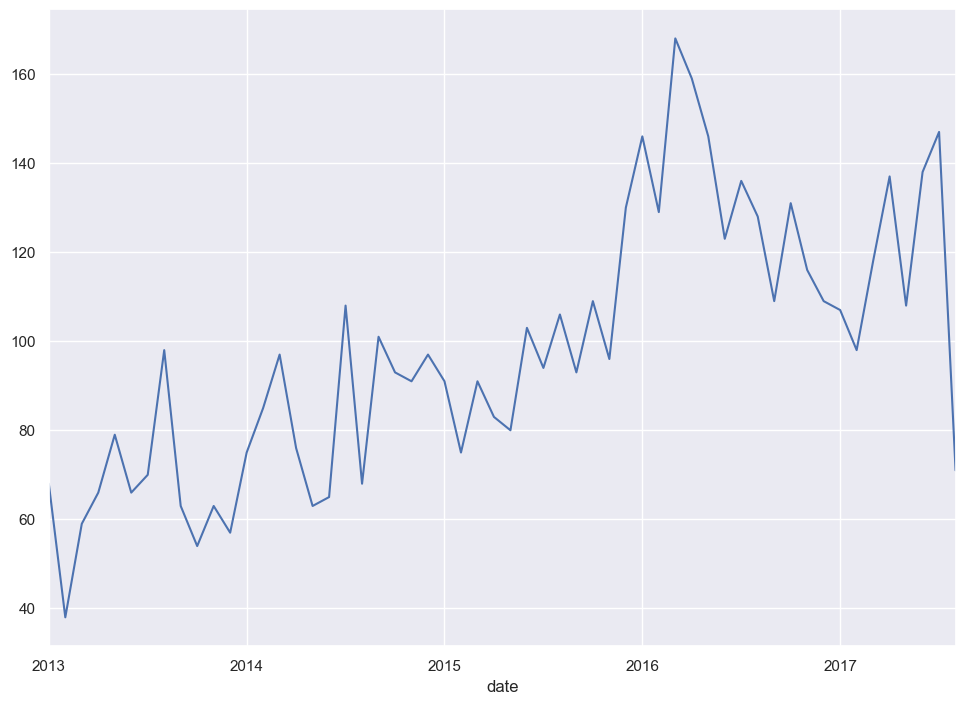

In [81]:
trainset_1_auto.sales.resample('M').sum().plot()

* Estacionalidad (s_SARIMA) de aproximadamente 4 meses (120 días)?

In [82]:
sarima_1_auto=SARIMAX(train.sales, order=([1, 7, 14, 21], 1, 1), seasonal_order=(1, 1, 1, 120)).fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.32376D+00    |proj g|=  8.71935D-02


 This problem is unconstrained.



At iterate    5    f=  2.20833D+00    |proj g|=  9.18681D-02

At iterate   10    f=  2.17842D+00    |proj g|=  1.92953D-02

At iterate   15    f=  2.16895D+00    |proj g|=  6.80743D-03

At iterate   20    f=  2.16742D+00    |proj g|=  3.92304D-03

At iterate   25    f=  2.16731D+00    |proj g|=  3.73172D-04

At iterate   30    f=  2.16730D+00    |proj g|=  2.88138D-04

At iterate   35    f=  2.16730D+00    |proj g|=  2.03400D-04

At iterate   40    f=  2.16730D+00    |proj g|=  8.05099D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     64      1     0     0   3.271D-05   2.167D+00
  F =   2.16729559932


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [83]:
sarima_1_auto.params

ar.L1        0.011103
ar.L7        0.069244
ar.L14       0.103204
ar.L21       0.132242
ma.L1       -0.999851
ar.S.L120   -0.043080
ma.S.L120   -0.999759
sigma2       5.669203
dtype: float64

In [84]:
sarima_1_auto.predict(typ='levels')

date
2013-01-01    0.000000
2013-01-02    0.000000
2013-01-03    1.999976
2013-01-04    2.999988
2013-01-05    3.000000
                ...   
2016-01-26    3.779715
2016-01-27    5.149555
2016-01-28    2.044351
2016-01-29    3.527378
2016-01-30    6.930442
Name: predicted_mean, Length: 1122, dtype: float64

<AxesSubplot: xlabel='date'>

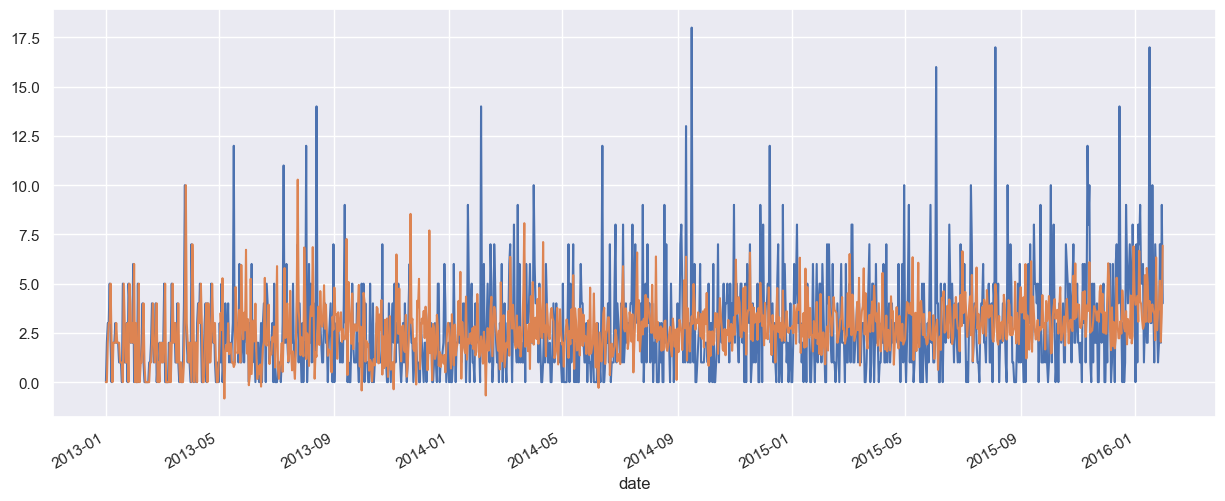

In [85]:
train.sales.plot(figsize=(15, 6))
sarima_1_auto.predict(typ='levels').plot()

* El modelo captura mejor la variabilidad y la tendencia que los modelos anteriores.
* El modelo es capaz de hacer predicciones más precisas para tiempos más recientes (entre enero y abril de 2013 aproximadamente).

In [86]:
# Predicciones para el conjunto de datos de prueba:
prediccion_sarima_1_auto=sarima_1_auto.predict(start=train.shape[0]+1, end=train.shape[0]+test.shape[0], typ='levels')
prediccion_sarima_1_auto.index=test.index
prediccion_sarima_1_auto


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


date
2016-02-01    2.095094
2016-02-02    3.030859
2016-02-03    3.771402
2016-02-04    2.948222
2016-02-05    5.450348
                ...   
2017-08-11    4.853020
2017-08-12    4.337949
2017-08-13    4.342579
2017-08-14    4.031781
2017-08-15    4.098926
Name: predicted_mean, Length: 561, dtype: float64

<AxesSubplot: xlabel='date'>

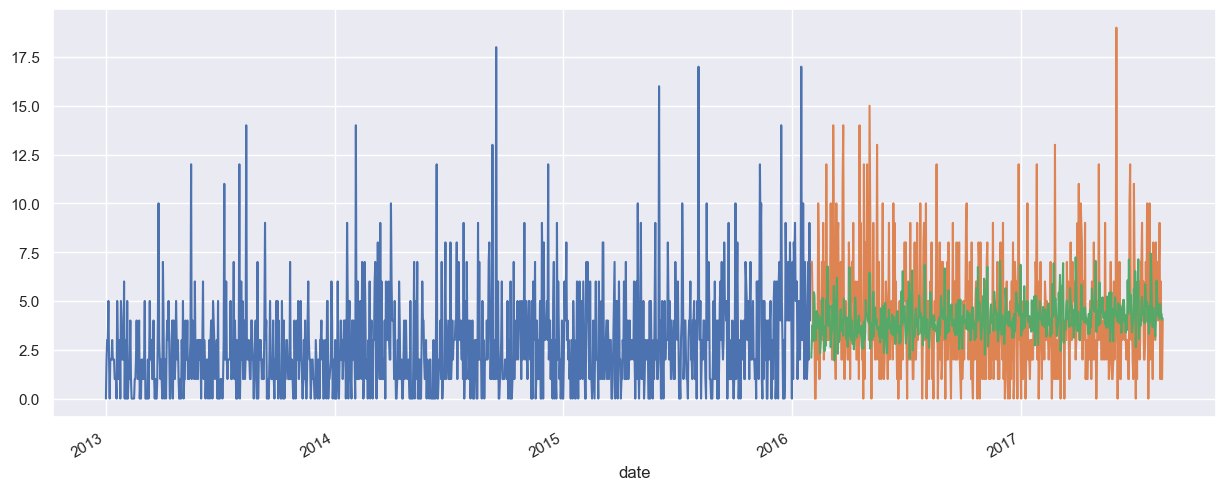

In [87]:
# Visualizando las predicciones
train.sales.plot(figsize=(15,6))
test.sales.plot(figsize=(15,6))
prediccion_sarima_1_auto.plot(figsize=(15,6))

* Los pronósticos capturan mejor la tendencia y la variabilidad que los modelos anteriores.

In [88]:
# Calculando el error cuadratico medio
sarima_1_auto_SME=((test.sales - prediccion_sarima_1_auto)**2).mean()
sarima_1_auto_SME

9.298989479494047